In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings
filterwarnings("ignore")

## Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [208]:
df = pd.read_csv("cubic_zirconia.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [171]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,NaN,NaN,NaN,13484.0,7784.846691,1.0,6742.5,13484.0,20225.5,26967.0
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8


<AxesSubplot:>

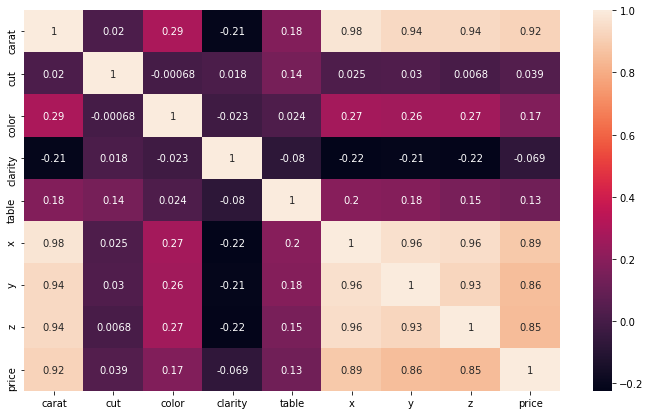

In [210]:
plt.figure(figsize=(12,7))
sns.heatmap(X.iloc[:].corr(),annot=True)

In [172]:
#Checking null values
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [173]:
# % Null values
df.isnull().sum()/df.isnull().sum().sum()*100

Unnamed: 0      0.0
carat           0.0
cut             0.0
color           0.0
clarity         0.0
depth         100.0
table           0.0
x               0.0
y               0.0
z               0.0
price           0.0
dtype: float64

Since depth has over 100% Null values, we would drop this column for now.

In [174]:
df=df.drop('depth',axis=1)

In [175]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,59.0,4.35,4.43,2.65,779


In [176]:
# Checking for datatypes?
df.select_dtypes(include='object').head()

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


It seems that the columns cut, color , clarity needs to be cleaned and converted to Float/int dtype

In [177]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes 

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  int8   
 3   color       26967 non-null  int8   
 4   clarity     26967 non-null  int8   
 5   table       26967 non-null  float64
 6   x           26967 non-null  float64
 7   y           26967 non-null  float64
 8   z           26967 non-null  float64
 9   price       26967 non-null  int64  
dtypes: float64(5), int64(2), int8(3)
memory usage: 1.5 MB


In [179]:
#Checking for shape
df.shape

(26967, 10)

In [180]:
#Checking for duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Unnamed: 0,carat,cut,color,clarity,table,x,y,z,price


In [181]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,table,x,y,z,price
0,1,0.30,2,1,2,58.0,4.27,4.29,2.66,499
1,2,0.33,3,3,1,58.0,4.42,4.46,2.70,984
2,3,0.90,4,1,7,60.0,6.04,6.12,3.78,6289
3,4,0.42,2,2,4,56.0,4.82,4.80,2.96,1082
4,5,0.31,2,2,6,59.0,4.35,4.43,2.65,779


Unnamed: 0
Skew : 0.0


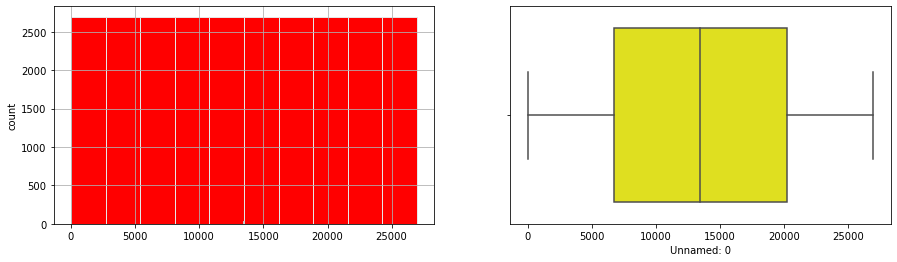

carat
Skew : 1.12


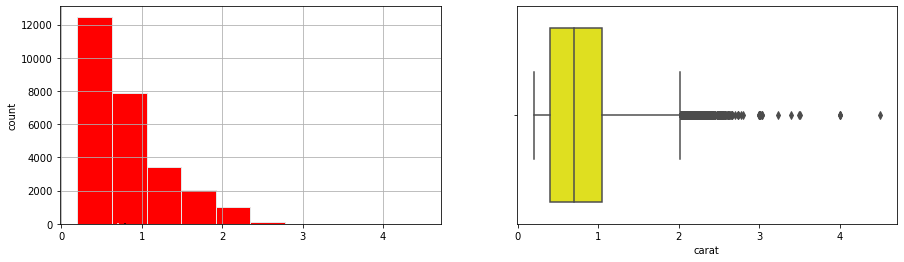

cut
Skew : -0.18


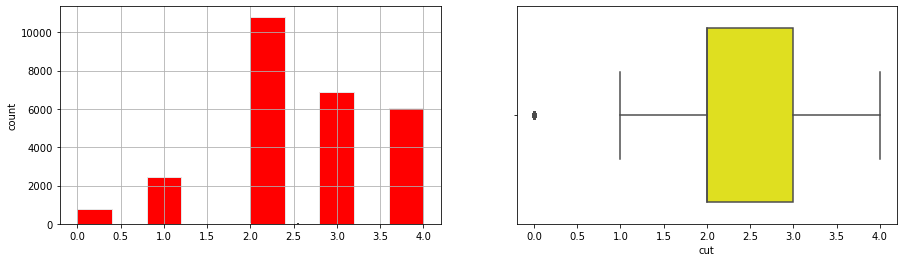

color
Skew : 0.19


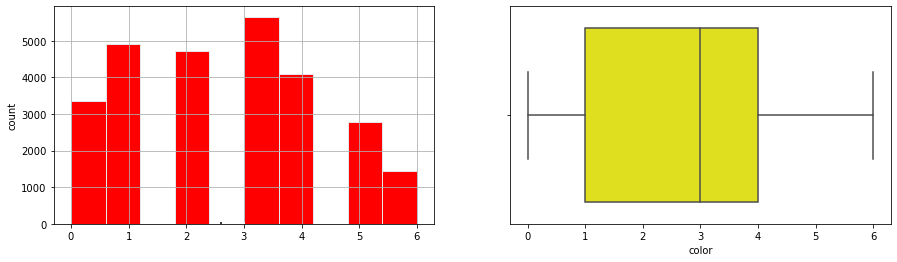

clarity
Skew : 0.18


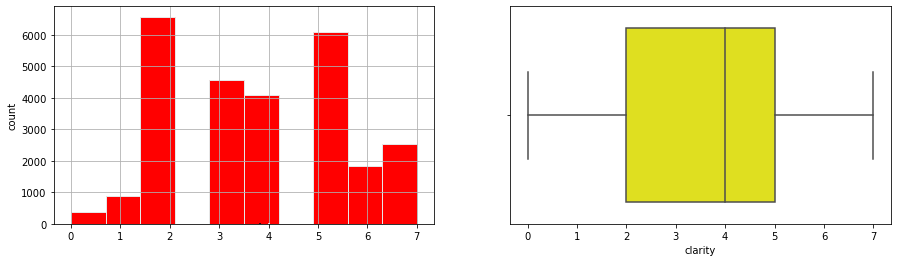

table
Skew : 0.77


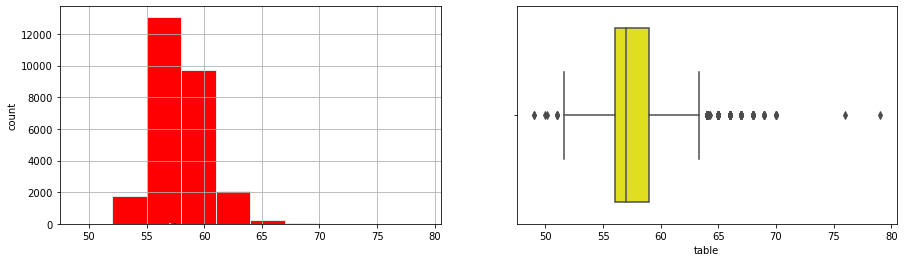

x
Skew : 0.39


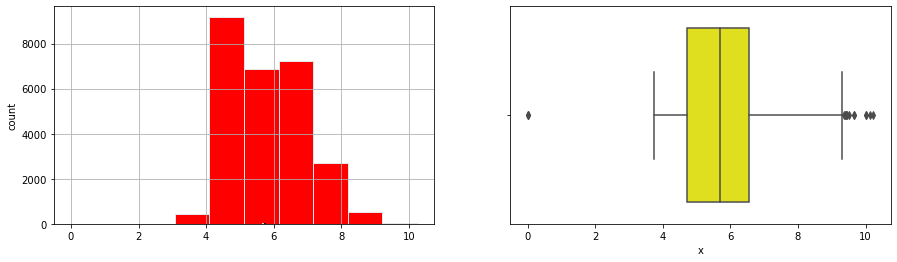

y
Skew : 3.85


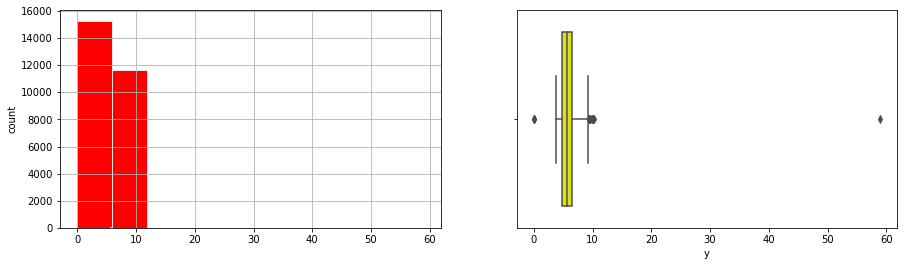

z
Skew : 2.57


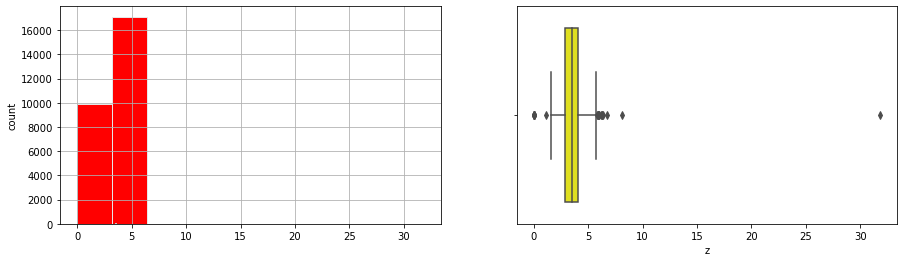

price
Skew : 1.62


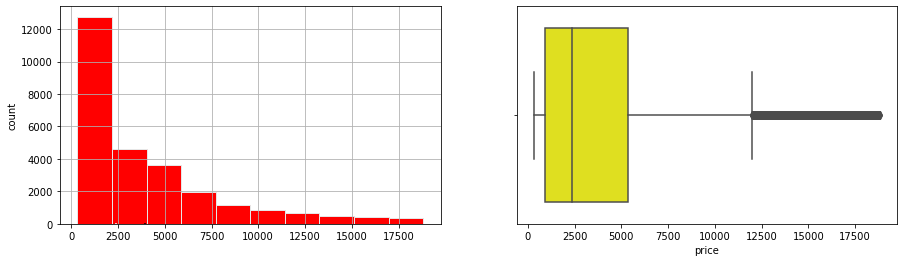

In [182]:
#Univariate Analysis
cont_cols = list(df.columns)
for col in cont_cols:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10,edgecolor='#E6E6E6', color='Red')
    plt.vlines(df[col].mean(),ymin = 0, ymax = 40,color = 'Black')
    plt.vlines(df[col].median(),ymin = 0, ymax = 40,color = 'White')
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(df[col],color='Yellow')
    plt.show()

The diagram shows that Unnamed:0, carat, color, clarity,table,x,y,z,price are right skewed whereas cut is left skewed.

The y and z have highly skewed.

The variables carat,cut,table,x,y,z,price have outliers.

The variables clarity,color and Unnamed:0 does not posses any outliers

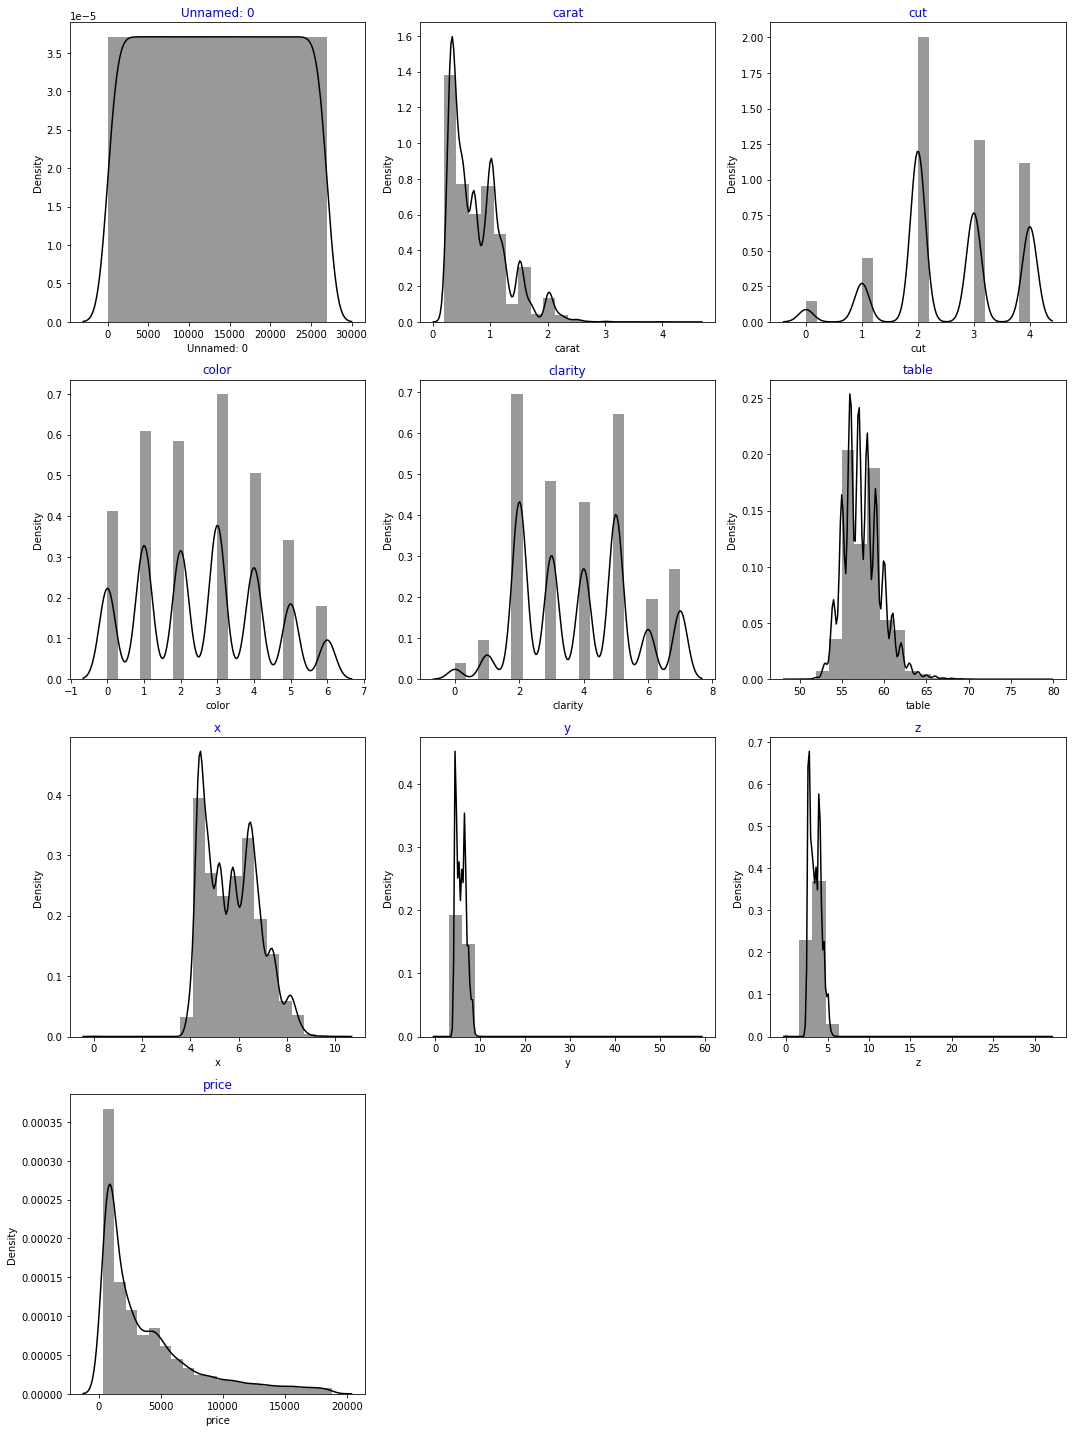

In [183]:
data_scatter=df.copy(deep=True)
fig=plt.figure(figsize=(15,20))
for i in range(0,len(data_scatter.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.distplot(data_scatter[data_scatter.columns[i]], bins=20, color= 'Black')
    ax.set_title(data_scatter.columns[i],color='Blue')
plt.tight_layout()

Unnamed: 0 vs price


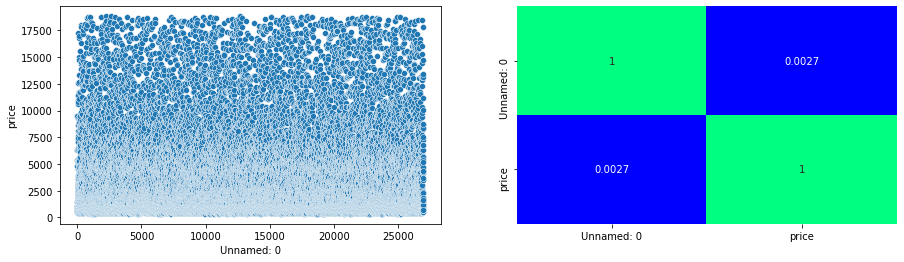

carat vs Unnamed: 0


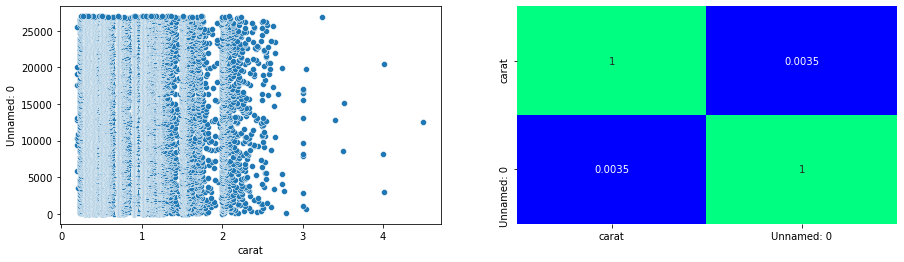

cut vs carat


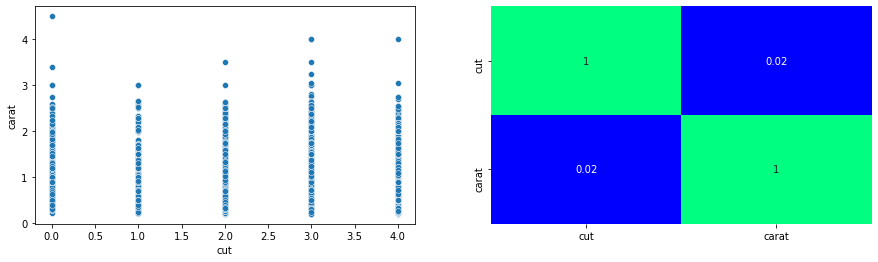

color vs cut


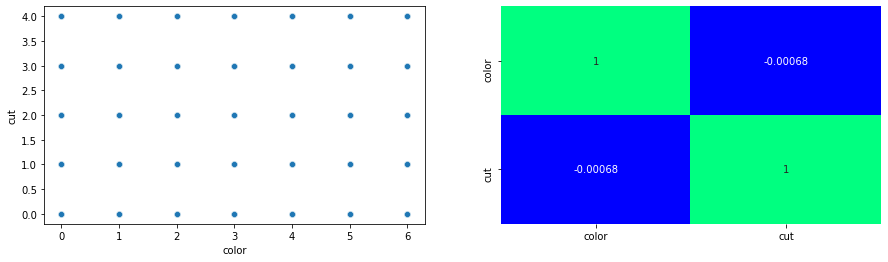

clarity vs color


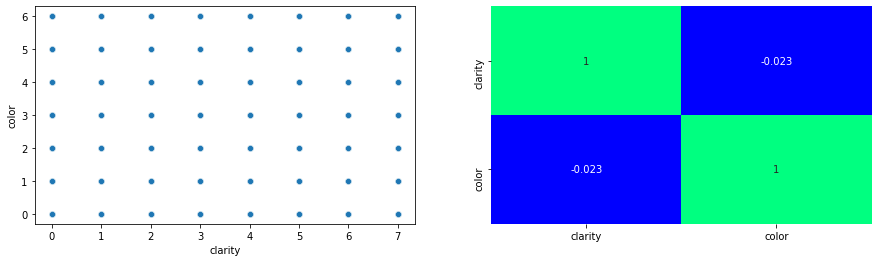

table vs clarity


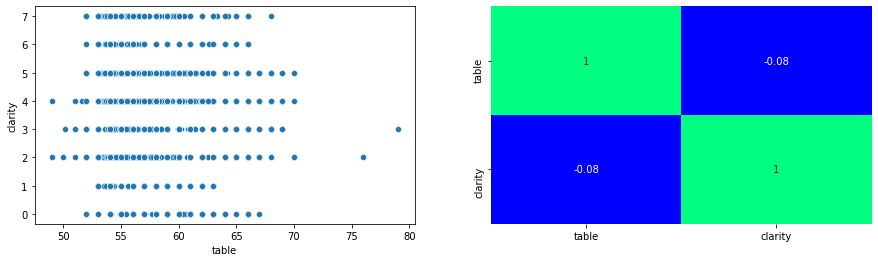

x vs table


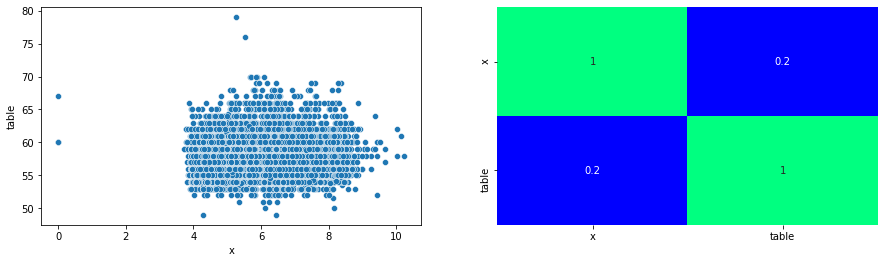

y vs x


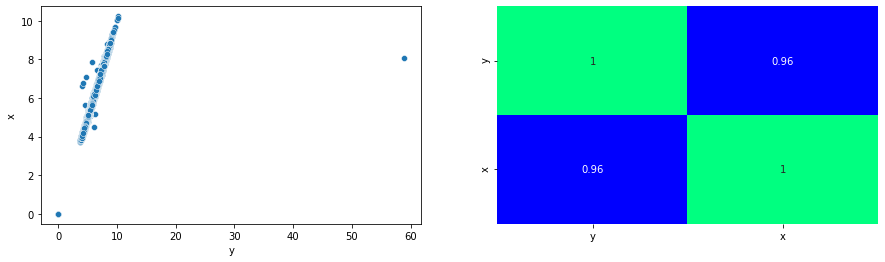

z vs y


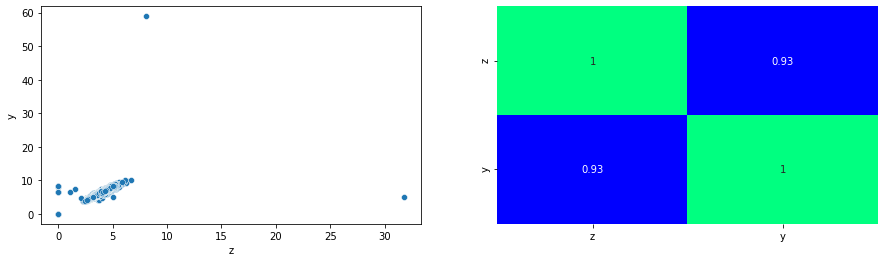

price vs z


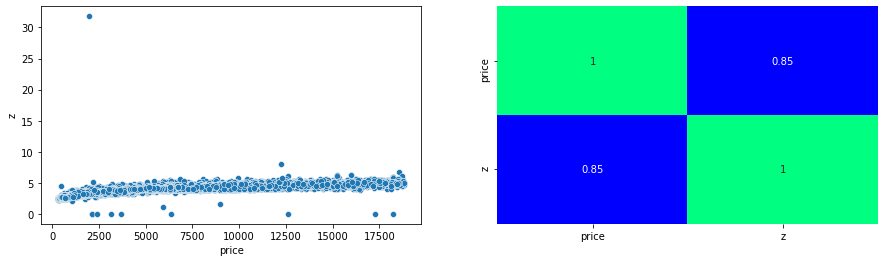

In [184]:
# Bivariate Analysis
sns.color_palette("tab10")

cont_cols = list(df.columns)
for col in range(0,len(cont_cols)):
    print(cont_cols[col],'vs',cont_cols[col-1])
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.scatterplot(df[cont_cols[col]],df[cont_cols[col-1]])
    plt.subplot(1,2,2)
    sns.heatmap(np.corrcoef(df[cont_cols[col]],df[cont_cols[col-1]]),annot=True, 
                yticklabels=[cont_cols[col],cont_cols[col-1]],xticklabels=[cont_cols[col],cont_cols[col-1]]
               ,cmap='winter',cbar=False)
    plt.show()

<AxesSubplot:>

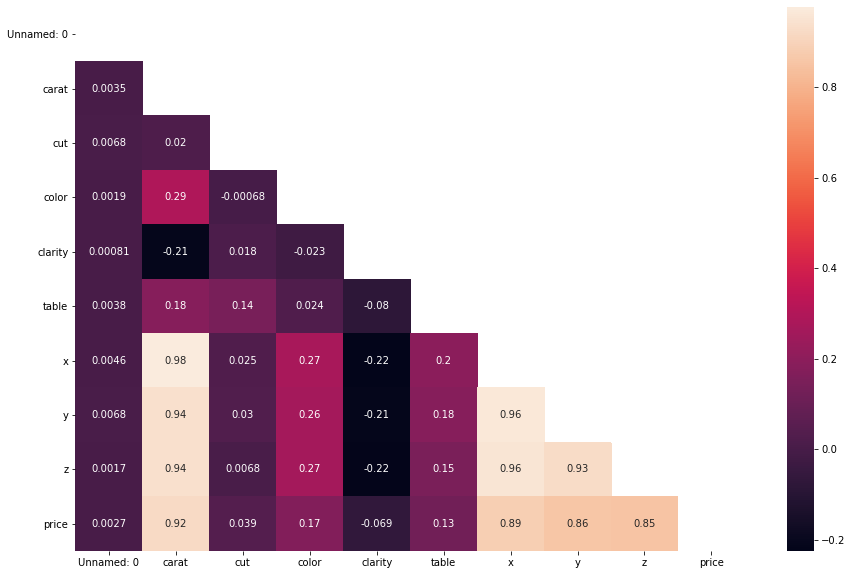

In [185]:
sns.color_palette("tab10")
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),annot = True,mask=mask)


There is high positive correlation among following variables.
1.x and carat         
2.y and carat        
3.z and carat          
4.price and carat          
5.y and x          
6.z and x               
7.price and x              
8.z and y                 
9.price and y                  
10.price and z              



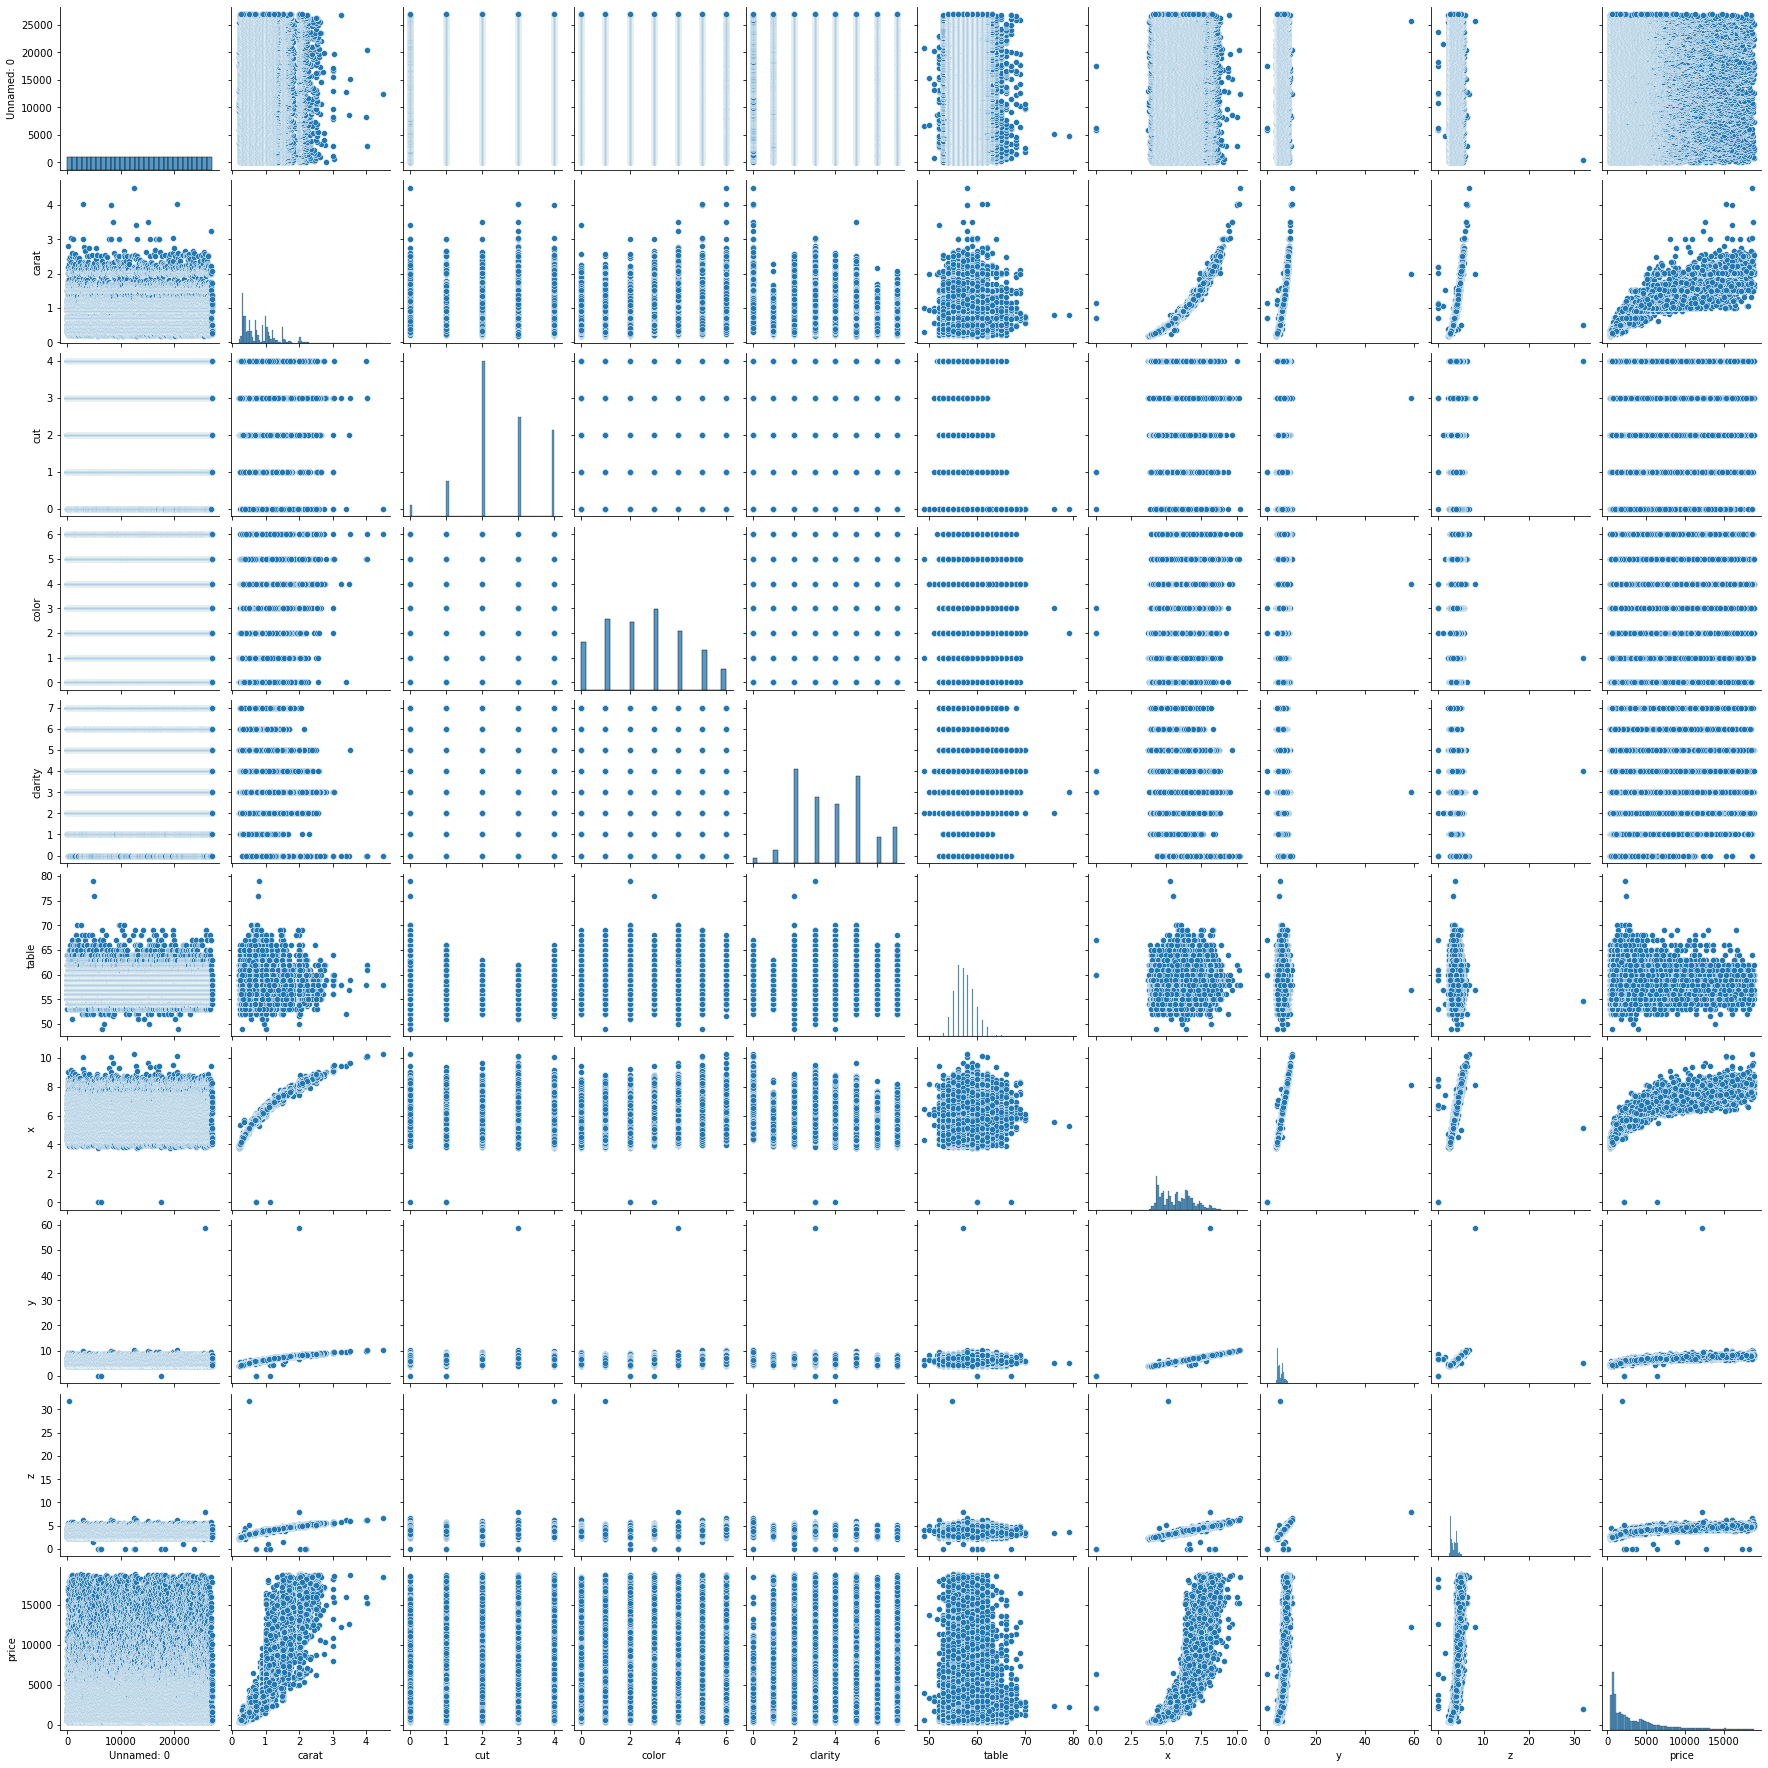

In [186]:
sns.pairplot(df);

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [188]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
table         0
x             0
y             0
z             0
price         0
dtype: int64

The examination of statistical relationships between ordinal variables most commonly uses crosstabulation (also known as contingency or bivariate tables). Chi Square tests-of-independence are widely used to assess relationships between two independent nominal variables.
There are 697 null values in depth in the dataset. The values can be equaled to zero. 


### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [189]:
x = df.drop('Unnamed: 0', axis=1)
y = df.price

In [190]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.30)

In [191]:
ss=StandardScaler() 
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

**Make 4 models using ANN, Decision Tree, Random Forest, and Linear Regression**

- Check Train and Test RMSE
- Check Train and Test Scores

In [192]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  
    
    if (i != annr) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                           Train RMSE     Test RMSE  Training Score  \
Linear Regression        1.375825e-12  1.334468e-12        1.000000   
Decision Tree Regressor  0.000000e+00  2.759866e+00        1.000000   
Random Forest Regressor  6.461305e-01  1.623224e+00        1.000000   
ANN Regressor            4.940466e+00  5.774866e+00        0.999999   

                         Test Score  
Linear Regression          1.000000  
Decision Tree Regressor    1.000000  
Random Forest Regressor    1.000000  
ANN Regressor              0.999998  


Looks Like ANN, DT, and RF are under-fitting, Let's Grid Search to get the best parameter. 

You can also visualise the tree and see where to prune it and decide the max_depth and other parameters

#### Grid Search on Decision Tree

In [193]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 15}


Let us take Max_depth as 15, min_samples_leaf as 3 and Min_sample_split as 15. 

#### Using Grid Search for Random Forest

In [194]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [195]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [199]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 500}


In [203]:
best_params_rfr={'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 500}

In [204]:
for feature in df.columns: 
    if df[feature].dtype == 'float':
        df[feature] = pd.Categorical(df[feature]).codes 

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  26967 non-null  int64
 1   carat       26967 non-null  int16
 2   cut         26967 non-null  int8 
 3   color       26967 non-null  int8 
 4   clarity     26967 non-null  int8 
 5   table       26967 non-null  int8 
 6   x           26967 non-null  int16
 7   y           26967 non-null  int16
 8   z           26967 non-null  int16
 9   price       26967 non-null  int64
dtypes: int16(4), int64(2), int8(4)
memory usage: 737.5 KB


#### Using Grid Search for ANN

In [206]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=10000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
print(grid_search.best_params_)

In [ ]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='sgd',random_state=123, 
                    max_iter=10000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=15,min_samples_leaf=15,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != annr):
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))